# Importing Dataset

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
!pip install imbalanced-learn

In [9]:
df = pd.read_csv('/content/bangalore-cas-alerts.csv')

In [10]:
df.head(10)

,deviceCode_deviceCode,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_location_wardName,deviceCode_pyld_alarmType,deviceCode_pyld_speed,deviceCode_time_recordedTime_$date
0,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
1,864504031502210,12.984595,77.744087,Kadugodi,PCW,32,2018-02-01T01:48:59.000Z
2,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
3,864504031502210,12.987233,77.741119,Garudachar Playa,FCW,41,2018-02-01T01:50:00.000Z
4,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z
5,864504031502210,12.987503,77.740051,Hudi,Overspeed,37,2018-02-01T01:50:11.000Z
6,864504031502210,12.987523,77.736702,Kadugodi,HMW,32,2018-02-01T01:50:50.000Z
7,864504031502210,12.987523,77.736702,Kadugodi,HMW,32,2018-02-01T01:50:50.000Z
8,864504031502210,12.988210,77.731369,Hudi,Overspeed,27,2018-02-01T01:52:26.000Z
9,864504031502210,12.988210,77.731369,Hudi,Overspeed,27,2018-02-01T01:52:26.000Z


In [11]:
#Checking missing values
df.isnull().sum()

deviceCode_deviceCode                 0
deviceCode_location_latitude          0
deviceCode_location_longitude         0
deviceCode_location_wardName          0
deviceCode_pyld_alarmType             0
deviceCode_pyld_speed                 0
deviceCode_time_recordedTime_$date    0
dtype: int64

In [12]:
# Remove two columns name is 'C' and 'D'
df = df.drop(['deviceCode_deviceCode', 'deviceCode_location_wardName', 'deviceCode_time_recordedTime_$date'], axis=1)

In [13]:
df.head(10)

,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_pyld_alarmType,deviceCode_pyld_speed
0,12.984595,77.744087,PCW,32
1,12.984595,77.744087,PCW,32
2,12.987233,77.741119,FCW,41
3,12.987233,77.741119,FCW,41
4,12.987503,77.740051,Overspeed,37
5,12.987503,77.740051,Overspeed,37
6,12.987523,77.736702,HMW,32
7,12.987523,77.736702,HMW,32
8,12.988210,77.731369,Overspeed,27
9,12.988210,77.731369,Overspeed,27


# Upsampling

Text(0, 0.5, 'Frequency')

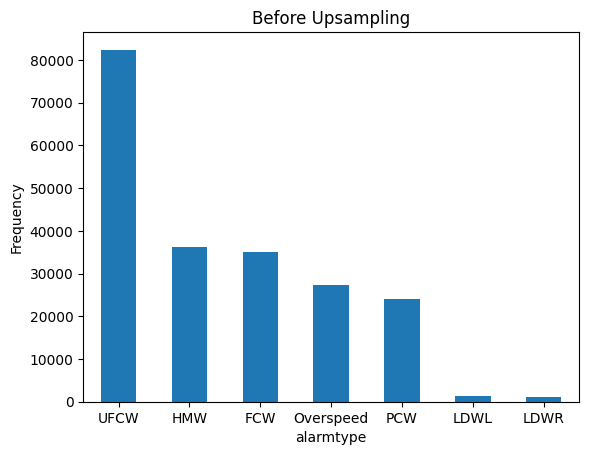

In [14]:
count_classes = pd.value_counts(df['deviceCode_pyld_alarmType'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Before Upsampling")
plt.xticks()
plt.xlabel("alarmtype")
plt.ylabel("Frequency")

In [15]:
df['deviceCode_pyld_alarmType'].value_counts()

UFCW         82425
HMW          36143
FCW          35000
Overspeed    27440
PCW          24003
LDWL          1412
LDWR          1194
Name: deviceCode_pyld_alarmType, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE
y = df.deviceCode_pyld_alarmType
x = df.drop(['deviceCode_pyld_alarmType'], axis=1)
x.head()

,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_pyld_speed
0,12.984595,77.744087,32
1,12.984595,77.744087,32
2,12.987233,77.741119,41
3,12.987233,77.741119,41
4,12.987503,77.740051,37


In [17]:
x.shape, y.shape
smk = SMOTE(random_state=15)
x_res,y_res=smk.fit_resample(x, y)

In [18]:
x_res.shape, y_res.shape

((576975, 3), (576975,))

In [19]:
y_res.value_counts()

PCW          82425
FCW          82425
Overspeed    82425
HMW          82425
UFCW         82425
LDWL         82425
LDWR         82425
Name: deviceCode_pyld_alarmType, dtype: int64

Text(0, 0.5, 'Frequency')

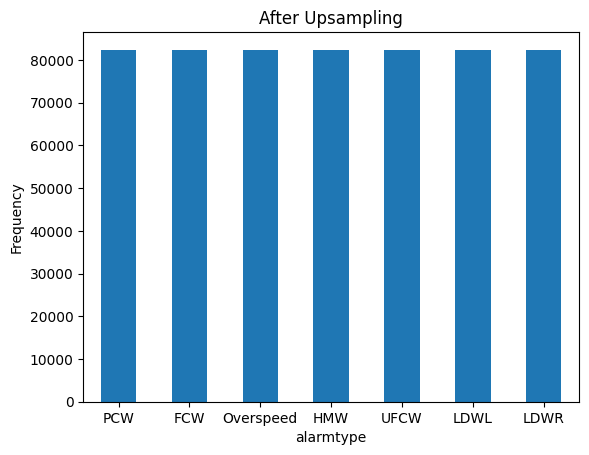

In [20]:
count_classes = pd.value_counts(y_res, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("After Upsampling")
plt.xticks()
plt.xlabel("alarmtype")
plt.ylabel("Frequency")

# Encoding and Scaling

In [21]:
y_res, label = pd.factorize(y_res)

In [22]:
print(label)

Index(['PCW', 'FCW', 'Overspeed', 'HMW', 'UFCW', 'LDWL', 'LDWR'], dtype='object')


In [23]:
print(y.head())

0          PCW
1          PCW
2          FCW
3          FCW
4    Overspeed
Name: deviceCode_pyld_alarmType, dtype: object


In [24]:
#Standarization
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
x.iloc[:,:] = scaler.fit_transform(x.iloc[:,:])

In [27]:
x.head()

,deviceCode_location_latitude,deviceCode_location_longitude,deviceCode_pyld_speed
0,0.513739,0.743451,0.712843
1,0.513739,0.743451,0.712843
2,0.610233,0.643886,1.367383
3,0.610233,0.643886,1.367383
4,0.620106,0.608053,1.076476


# Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.30, random_state=5)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(403882, 3)
(173093, 3)
(403882,)
(173093,)


# Implementing ML Algorithms

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_accuracy = knn.score(x_test, y_test)
knn_accuracy

0.7573096543476628

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=5)
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
dt_accuracy=dt.score(x_test, y_test)
dt_accuracy

0.7988133546706105

In [32]:
#Random Forest with best accuracy
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(random_state=5)
randf.fit(x_train,y_train)
pred_randf = randf.predict(x_test)
#pred_randf_with_categorical_value = le.inverse_transform(pred_randf)
#print(pred_randf_with_categorical_value)
randf_accuracy = randf.score(x_test, y_test)
randf_accuracy

0.831743629147337

In [33]:
print(pred_randf.shape)

(173093,)


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=5)
gb.fit(x_train,y_train)
gb_accuracy=gb.score(x_test, y_test)
gb_accuracy

0.5456604253204924

In [35]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier(random_state=5)
adab.fit(x_train,y_train)
adab_accuracy=adab.score(x_test, y_test)
adab_accuracy

0.4036269519853489

In [36]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb_accuracy=xgb.score(x_test, y_test)
xgb_accuracy

0.6549600503775427

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=5)
logreg.fit(x_train, y_train)
logreg_accuracy=logreg.score(x_test, y_test)
logreg_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3700958444304507

In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_accuracy=nb.score(x_test, y_test)
nb_accuracy

0.38263823493728805

# Saving above ML Models

In [39]:
import joblib as jb

In [40]:
#Saving models using Joblib
jb.dump(knn,'knn')
jb.dump(dt,'dt')
jb.dump(randf,'randf')
jb.dump(gb,'gb')
jb.dump(adab,'adab')
jb.dump(xgb,'xgb')
jb.dump(logreg,'logreg')
jb.dump(nb,'nb')

['nb']

In [41]:
#Loading those saved models
import joblib as jb
knn_default = jb.load('knn')
dt_default =  jb.load('dt')
randf_default =  jb.load('randf')
gb_default =  jb.load('gb')
adab_default =  jb.load('adab')
xgb_default =  jb.load('xgb')
logreg_default =  jb.load('logreg')
nb_default =  jb.load('nb')

In [42]:
#Printing accuracy from the saved model files
print("KNN accuracy           : ", knn_default.score(x_test,y_test))
print("Decision Tree accuracy : ", dt_default.score(x_test,y_test))

print("Random Forest accuracy : ", randf_default.score(x_test,y_test))
print("Gradient Boosting      : ", gb_default.score(x_test,y_test))
print("AdaBoost accuracy      : ", adab_default.score(x_test,y_test))
print("XGBoost accuracy       : ", xgb_default.score(x_test,y_test))
print("Logistic Regression    : ", logreg_default.score(x_test,y_test))
print("Naive Bayes accuracy   : ", nb_default.score(x_test,y_test))

KNN accuracy           :  0.7573096543476628
Decision Tree accuracy :  0.7988133546706105
Random Forest accuracy :  0.831743629147337
Gradient Boosting      :  0.5456604253204924
AdaBoost accuracy      :  0.4036269519853489
XGBoost accuracy       :  0.6549600503775427
Logistic Regression    :  0.3700958444304507
Naive Bayes accuracy   :  0.38263823493728805


# Model Performance Evaluation

### Accuracy Comparison of Algorithms

In [43]:
d = {'Algorithm': ['K Nearest Neighbors','Decision Tree',
                   'Random Forest','Gradient Boost','Ada Boost','XGBoost','Logistic Regression','Naive Bayes'],
     'Accuracy (in percent)': [75.73,79.88,83.17,54.56,40.36,65.49,37.00,38.26]}
df_accuracy = pd.DataFrame(data=d)
df_accuracy

,Algorithm,Accuracy (in percent)
0,K Nearest Neighbors,75.73
1,Decision Tree,79.88
2,Random Forest,83.17
3,Gradient Boost,54.56
4,Ada Boost,40.36
5,XGBoost,65.49
6,Logistic Regression,37.00
7,Naive Bayes,38.26


<ipython-input-44-1ce3ed2c7e6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x="Algorithm", y="Accuracy (in percent)", data=df_accuracy,palette='hot',edgecolor=sns.color_palette('dark',7))


Text(0, 0.5, 'Accuracy (in percent)')

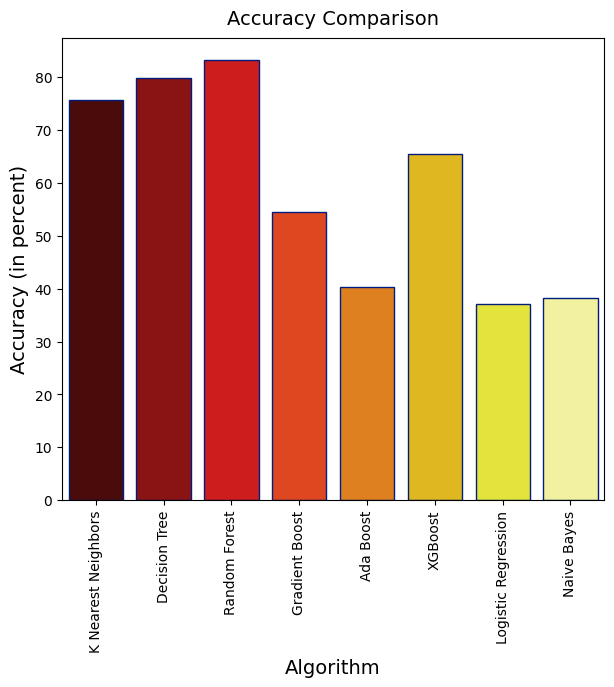

In [44]:
plt.figure(figsize=(7,6))
plt.title('Accuracy Comparison',fontsize=14, pad = 10.0)
p = sns.barplot(x="Algorithm", y="Accuracy (in percent)", data=df_accuracy,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
p.set_xlabel('Algorithm', fontsize=14)
p.set_ylabel('Accuracy (in percent)', fontsize=14)
#p.bar_label(p.containers[0])
#plt.savefig('Accuracy Comparison', dpi=300);

### Confusion Matrix & ROC-AUC

In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
from sklearn.multiclass import OneVsRestClassifier

In [46]:
cf_matrix = confusion_matrix(y_test,pred_randf)
cf_matrix

array([[19889,  1274,   433,   821,  2189,   100,   138],
       [ 1181, 17778,   732,  3178,   700,   565,   496],
       [  387,   541, 22025,   871,   775,   143,    89],
       [  777,  3015,  1093, 17789,   952,   548,   350],
       [ 2041,   617,   578,   651, 20901,     8,     9],
       [   80,   306,    82,   351,    11, 22791,  1135],
       [   77,   309,    44,   227,    17,  1233, 22796]])

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'FCW'),
  Text(0, 1.5, 'HMW'),
  Text(0, 2.5, 'LDWL'),
  Text(0, 3.5, 'LDWR'),
  Text(0, 4.5, 'Overspeed'),
  Text(0, 5.5, 'PCW'),
  Text(0, 6.5, 'UFCW')])

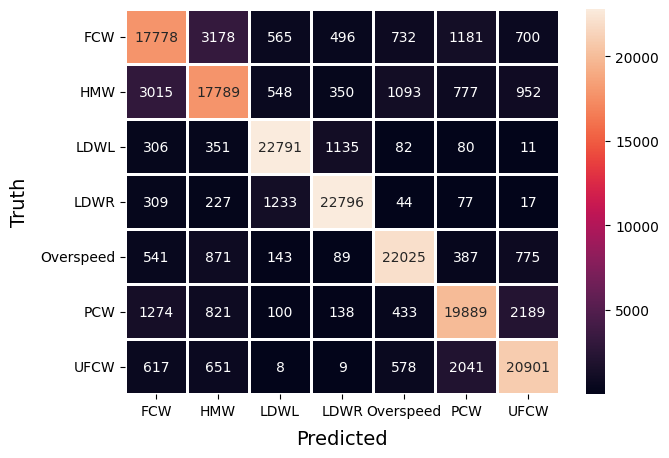

In [47]:
import seaborn as sns
cf_matrix = pd.crosstab(label[y_test],label[pred_randf])
fig = plt.subplots(figsize=(7,5))
s = sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt = 'g')
s.set_xlabel('Predicted', labelpad=8.0, fontsize=14)
s.set_ylabel('Truth', labelpad=8.0, fontsize=14)
#plt.savefig('Confusion Matrix',dpi=300);
plt.yticks(rotation=0)

In [48]:
print(classification_report(y_test,pred_randf,target_names=label))

              precision    recall  f1-score   support

         PCW       0.81      0.80      0.81     24844
         FCW       0.75      0.72      0.73     24630
   Overspeed       0.88      0.89      0.88     24831
         HMW       0.74      0.73      0.73     24524
        UFCW       0.82      0.84      0.83     24805
        LDWL       0.90      0.92      0.91     24756
        LDWR       0.91      0.92      0.92     24703

    accuracy                           0.83    173093
   macro avg       0.83      0.83      0.83    173093
weighted avg       0.83      0.83      0.83    173093



In [49]:
clf = OneVsRestClassifier(randf)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred_prob = clf.predict_proba(x_test)

In [50]:
fpr = {}
tpr = {}
thresh ={}

n_class = 6
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

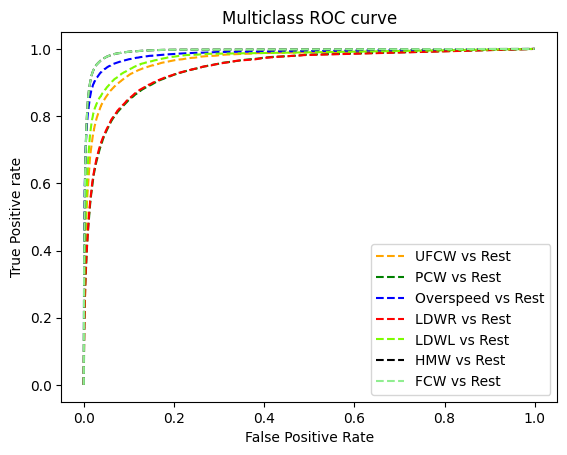

In [51]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='UFCW vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='PCW vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Overspeed vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='LDWR vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='lawngreen', label='LDWL vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='black', label='HMW vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='lightgreen', label='FCW vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
#plt.savefig('Multiclass ROC',dpi=300);

Explainable AI

In [52]:
pip install shap

In [53]:
import shap

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(randf)
# Calculate Shap values
shap_values = explainer.shap_values(x_train)

In [ ]:
shap.summary_plot(shap_values, x_train)